<a href="https://colab.research.google.com/github/ITU-Business-Analytics-Team/Business_Analytics_for_Professionals/blob/main/Part%20I%20%3A%20Methods%20%26%20Technologies%20for%20Business%20Analytics/Chapter%203%3A%20Prediction%20Modelling/3_9_Reinforcement_Learning_MonteCarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reinforcement Learning**
## **Monte Carlo**

### **Problem Definition**
The well-known maze problem is used to demonstrate the use of Monte Carlo  algorithm. There is a ***n x n*** grid, which allows players to move in four directions: north, south, east, and west. Certain cells contain obtacles. The agent begins in one cell and works its way to the target cell. The objective is to determine the optimal sequence of motions that will result in the agent reaching the goal cell with the greatest reward.
The Q-learning technique is employed in this case to solve this problem. The following steps in building the algorithm are as follows:
1.   Define the environment as a class of objects in which agents operate.
2. Define the agents as a class of objects.
3. Finally, we trained our agent how to behave in the described environment  to achieve its purpose.

In [1]:
import numpy as np
import operator
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#First define gridmaze environment as a class
class Environment():
  def __init__(self, height, width, blocked_cell, start_cell, end_cell, current_location):
    #Define the dimensions of grid and cell features
    self.height = height
    self.width = width
    self.blocked_cell = blocked_cell
    self.end_cell = end_cell
    self.start_cell = start_cell
    self.current_location = current_location
    self.state_space=[]
    self.create_state_space()

    #Define the immediate reward of each cell if the agent reach moves that cell
    self.cell_reward = np.zeros((self.height, self.width))-1 #When agent moves from one cell to another, it gets -1 reward
    self.cell_reward[self.end_cell[0], self.end_cell[1]] = 10 #if the agent reaches the end cell, gets 10 reward
    self.cell_reward[self.blocked_cell[0], self.blocked_cell[1]] = -10 #if the agent tries to move the blocked cell, it gets -10 reward

    self.actions = ['Left', 'Right', 'Up','Down'] # There are 4 possible actions of the agent.

  def get_actions(self):
      return self.actions
  def create_state_space(self):    
      for i in range(self.height):
        for j in range(self.width):
          if (i,j)!=self.blocked_cell:
            self.state_space.append((i,j))    

  def return_reward(self, next_location):
     return self.cell_reward[next_location[0], next_location[1]]

  def check_end_cell(self):
      if self.current_location == self.end_cell:
        return True
  def check_blocked_cell(self):
      if self.current_location == self.blocked_cell:
        return True    
  
  def reset(self):
    self.current_location = self.state_space[np.random.choice(len(self.state_space))]
    while self.current_location==self.end_cell:
      self.current_location = self.state_space[np.random.choice(len(self.state_space))]
    
  def step(self, action):
        """Directs the agent forward. If agent is at the border of or adjacent to a blocked cell, the agent's position is unaffected; however, 
        the agent takes a negative reward. Reward is returned by function."""
              
        last_location = self.current_location
        
        # UP
        if action == 'Up':
            # If agent is at the top, stay still, collect reward
            if last_location[0] == 0:
                reward = self.return_reward(last_location)
            elif (last_location[0]-1, last_location[1]) == self.blocked_cell:
               reward = self.return_reward(last_location)
            else:
                self.current_location = ( self.current_location[0] - 1, self.current_location[1])
                reward = self.return_reward(self.current_location)
        
        # DOWN
        elif action == 'Down':
            # If agent is at bottom, stay still, collect reward
            if last_location[0] == self.height - 1:
                reward = self.return_reward(last_location)
            elif (last_location[0]+1, last_location[1]) == self.blocked_cell:
                reward = self.return_reward(last_location)
            else:
                self.current_location = ( self.current_location[0] + 1, self.current_location[1])
                reward = self.return_reward(self.current_location)
            
        # LEFT
        elif action == 'Left':
            # If agent is at the left, stay still, collect reward
            if last_location[1] == 0:
                reward = self.return_reward(last_location)
            elif (last_location[0], last_location[1]-1) == self.blocked_cell:
                reward = self.return_reward(last_location)
            else:
                self.current_location = ( self.current_location[0], self.current_location[1] - 1)
                reward = self.return_reward(self.current_location)

        # RIGHT
        elif action == 'Right':
            # If agent is at the right, stay still, collect reward
            if last_location[1] == self.width - 1:
                reward = self.return_reward(last_location)
            elif (last_location[0], last_location[1]+1) == self.blocked_cell:
                reward = self.return_reward(last_location)
            else:
                self.current_location = ( self.current_location[0], self.current_location[1] + 1)
                reward = self.return_reward(self.current_location)
                
        return reward

In [3]:
def play_episode(environment,max_steps_per_episode=20):
    environment.reset()
    s=environment.current_location
    a = np.random.choice(environment.actions) # first action is uniformly random
    # keep track of all states and rewards encountered
    episodestates = [s]
    episodeactions = [a]
    episoderewards = [0]
    steps = 0
    while not environment.check_end_cell():
        r = environment.step(a)
        next_s = environment.current_location
        # update states and rewards lists
        episodestates.append(next_s)
        episoderewards.append(r)
        s=next_s
        if not environment.check_end_cell():
            a = policy[s]
            episodeactions.append(a)
        steps += 1
        if steps >= max_steps_per_episode:
            break
    s = next_s
    return episodestates, episodeactions,episoderewards

In [4]:
environment = Environment(height=4, width=4, blocked_cell= (2,2), start_cell= (0,0), end_cell = (3,3), current_location = (0,0))

In [5]:
#Generate a random policy
policy={}
for s in environment.state_space:
  environment.current_location=s
  if not environment.check_end_cell():
    if not environment.check_blocked_cell():
      action = environment.actions[np.random.randint(0,len(environment.actions)-1)]
      policy[s]=action

In [6]:
# initialize Q(s,a) and sample counts
Q = {}
sample_counts={}
for s in environment.state_space:
  environment.current_location=s
  if not environment.check_end_cell(): # not a terminal state
    Q[s] = {}
    sample_counts[s] = {}
    for a in environment.actions:
      Q[s][a] = 0
      sample_counts[s][a]=0 #will be used to compute average 

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000


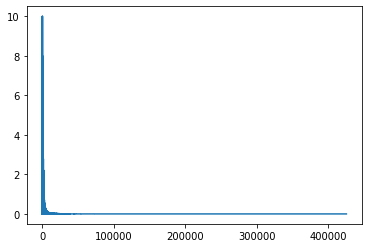

In [7]:
#Monte Carlo Method
GAMMA=0.9
# repeat until convergence
deltas = []
for it in range(100000):
    if it % 1000 == 0:
        print(it)

    # generate an episode using pi
    biggest_change = 0
    episodestates, episodeactions, episoderewards = play_episode(environment,max_steps_per_episode=20)
    # create a list of only state-action pairs for lookup
    states_actions = list(zip(episodestates, episodeactions))

    T = len(episodestates)
    G = 0
    for t in range(T - 2, -1, -1):
        # retrieve current s, a, r tuple
        s = episodestates[t]
        a = episodeactions[t]
        # update G
        G = episoderewards[t+1] + GAMMA * G

        # check if we have already seen (s, a) ("first-visit")
        if (s, a) not in states_actions[:t]:
            old_q = Q[s][a]
            sample_counts[s][a] += 1
            lr = 1 / sample_counts[s][a]
            Q[s][a] = old_q + lr * (G - old_q) #Remember the incremental implementation of taking averages

            # update policy
            maxValue = max(Q[s].values())
            action = np.random.choice([k for k, v in Q[s].items() if v == maxValue])
            policy[s] = action
        # update delta
            biggest_change = max(biggest_change, np.abs(old_q - Q[s][a]))
        deltas.append(biggest_change)

plt.plot(deltas)
#plt.xscale('log')
plt.show()

In [8]:
# determine the policy from Q*
policy = {}
V = {}
for s in environment.state_space:
    if s!=environment.end_cell:
      maxValue = max(Q[s].values())
      action = np.random.choice([k for k, v in Q[s].items() if v == maxValue])
      policy[s] = action
      V[s] = maxValue

### **Results** 
The above figure demonstrates that after a few episodes, Monte Carlo simulation converges and our agent has learned how to behave optimally in the specified environment.

In [9]:
V

{(0, 0): 1.8086276036002298,
 (0, 1): 3.1190349811870886,
 (0, 2): 4.578508046883691,
 (0, 3): 6.199054264487862,
 (1, 0): 3.1198398168060946,
 (1, 1): 4.575514713984178,
 (1, 2): 6.198340320969875,
 (1, 3): 7.9988887189423385,
 (2, 0): 4.578338033526144,
 (2, 1): 6.199351191450353,
 (2, 3): 10.0,
 (3, 0): 6.199535657428235,
 (3, 1): 7.9997178062631,
 (3, 2): 10.0}

In [10]:
#Function to print policy on a grid
def print_policy(policy,rows,columns):
    for i in range(rows):
        print("---------------------------------------")
        for j in range(columns):
              a = policy.get((i,j), ' ')
              print("  %s  |" % a, end="")
        print("")

In [11]:
print_policy(policy,4,4)

---------------------------------------
  Down  |  Down  |  Right  |  Down  |
---------------------------------------
  Down  |  Down  |  Right  |  Down  |
---------------------------------------
  Down  |  Down  |     |  Down  |
---------------------------------------
  Right  |  Right  |  Right  |     |


In [12]:
#Function to print values on a grid
def print_values(V, rows,columns):
    for i in range(rows):
        print("---------------------------")
        for j in range(columns):
            v = V.get((i,j), 0)
            if v >= 0:
                print(" %.2f|" % v, end="")
            else:
                print("%.2f|" % v, end="")
        print("")

In [13]:
print_values(V, 4,4)

---------------------------
 1.81| 3.12| 4.58| 6.20|
---------------------------
 3.12| 4.58| 6.20| 8.00|
---------------------------
 4.58| 6.20| 0.00| 10.00|
---------------------------
 6.20| 8.00| 10.00| 0.00|
